# CoinmarketCap API Script

This script utilizes CoinmarketCap's API to extract data from their website and store it in a CSV file. 
Subsequently, the data is transformed into various graphs for visualization purposes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator
from dateutil.parser import parse
import plotly.express as pX



In [308]:
from requests import Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
from time import time, sleep

df = pd.DataFrame()

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    # Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '31',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': 'aad4bb09-b00b-4da5-9ebc-ec926199e14f',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        # print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)

    # Use this if you just want to keep it in a dataframe
    df = pd.json_normalize(data['data'])
    df['Timestamp'] = pd.to_datetime('now', utc=True).strftime("%d-%m-%Y %H:%M:%S")
    df 
    
    if not os.path.isfile('/Users/coding/Documents/Python tests/APIDATA.csv'):
        df.to_csv('/Users/coding/Documents/Python tests/APIDATA0.csv', header = 'column_names')
    else: 
        df.to_csv('/Users/coding/Documents/Python tests/APIDATA0.csv', mode = 'a', header = False)

for i in range(300):
    api_runner()
    print('API has been successfully run!')
    sleep(60)  # sleep for 1 minute


API has been successfully run!


KeyboardInterrupt: 

In [316]:
df = pd.read_csv('/Users/coding/Documents/Python tests/APIDATA0.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19401131.00,...,47.65,547907329179.39,NaN,2023-06-13T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,13-06-2023 13:11:52
1,1,1027,Ethereum,ETH,ethereum,7000,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120226966.54,...,19.71,209431374819.42,NaN,2023-06-13T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,13-06-2023 13:11:52
2,2,825,Tether,USDT,tether,55468,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83495780837.67,...,7.86,87095547501.97,NaN,2023-06-13T13:10:00.000Z,1027.00,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,13-06-2023 13:11:52
3,3,1839,BNB,BNB,bnb,1458,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155854260.35,...,3.56,37787812979.56,NaN,2023-06-13T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,13-06-2023 13:11:52
4,4,3408,USD Coin,USDC,usd-coin,12966,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28285615126.73,...,2.66,28289354349.51,NaN,2023-06-13T13:10:00.000Z,1027.00,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,13-06-2023 13:11:52
5,5,52,XRP,XRP,xrp,965,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,51987017573.00,...,2.63,53734842652.08,NaN,2023-06-13T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,13-06-2023 13:11:52
6,6,2010,Cardano,ADA,cardano,837,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,34910481584.33,...,0.92,12635400913.03,NaN,2023-06-13T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,13-06-2023 13:11:52
7,7,74,Dogecoin,DOGE,dogecoin,728,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139749966383.71,...,0.81,8641978156.97,NaN,2023-06-13T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,13-06-2023 13:11:52
8,8,1958,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,90095393157.96,...,0.61,6462040142.09,NaN,2023-06-13T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,13-06-2023 13:11:52
9,9,5426,Solana,SOL,solana,472,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,398977615.67,...,0.58,8484457164.50,NaN,2023-06-13T13:10:00.000Z,NaN,NaN,NaN,NaN,NaN,13-06-2023 13:11:52


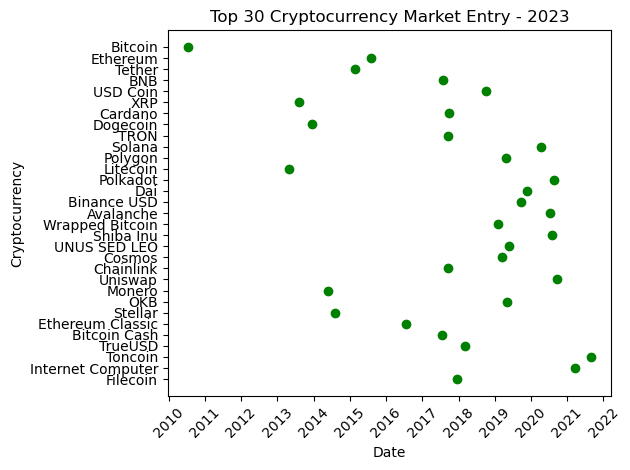

In [318]:
# In this visualization, I plot the top 30 largest cryptocurrencies of 2023 on a scatter plot.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter, YearLocator


f = pd.read_csv('/Users/coding/Documents/Python tests/APIDATA0.csv')
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Set display format

df = f.drop(columns=['id', 'platform.id', 'platform.symbol', 'platform.slug', 'platform.token_address', 'platform.name', 'quote.USD.tvl', 'quote.USD.last_updated', 'Unnamed: 0'])

x = df['date_added'].apply(parse)  # Use dateutil.parser.parse for correct date parsing
y = df['name']

plt.scatter(x, y, color='green')  # Change the color to green
plt.xlabel('Date')
plt.ylabel('Cryptocurrency')
plt.title('Top 30 Cryptocurrency Market Entry - 2023')

# Reverse the order of Y-axis
plt.gca().invert_yaxis()

# Set the x-axis major locator and formatter
plt.gca().xaxis.set_major_locator(YearLocator(base=1))  # 1-year intervals
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))

plt.xticks(rotation=45)  # Rotate x-axis tick labels for better visibility
plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()


In [233]:
df

,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,...,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,Timestamp
0,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19401043.00,19401043.00,False,...,-0.14,0.48,1.66,-2.61,-15.22,6.14,506735339591.49,47.67,548498456058.33,13-06-2023 11:54:56
1,Ethereum,ETH,ethereum,7000,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120226966.54,120226966.54,True,...,-0.15,0.15,-3.54,-2.97,-17.33,4.48,210209431084.18,19.77,210209431084.18,13-06-2023 11:54:56
2,Tether,USDT,tether,55466,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83366513300.21,86083529362.37,True,...,-0.01,-0.01,-0.04,-0.06,-0.09,-0.41,83367800079.64,7.84,86084858079.51,13-06-2023 11:54:56
3,BNB,BNB,bnb,1458,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155854280.19,155854280.19,False,...,0.03,1.35,-14.91,-24.20,-29.08,-22.94,36864346070.52,3.47,36864346070.52,13-06-2023 11:54:56
4,XRP,XRP,xrp,965,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,51987017573.00,99988884267.00,False,...,5.58,7.95,10.18,31.20,5.14,51.94,29102114943.68,2.74,55979581638.46,13-06-2023 11:54:56
5,USD Coin,USDC,usd-coin,12962,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28290016362.73,28290016362.73,False,...,-0.00,0.01,-0.01,-0.00,0.02,0.10,28291659094.63,2.66,28291659094.63,13-06-2023 11:54:56
6,Cardano,ADA,cardano,837,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,34910064614.80,35873953355.06,False,...,0.75,0.46,-19.78,-23.01,-35.97,-15.95,9882808437.71,0.93,12739202422.11,13-06-2023 11:54:56
7,Dogecoin,DOGE,dogecoin,728,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139748816383.71,139748816383.71,True,...,0.07,0.94,-7.35,-14.13,-31.39,-15.44,8640703619.28,0.81,8640703619.28,13-06-2023 11:54:56
8,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,90097004306.19,90097133475.12,True,...,0.22,2.76,-8.37,3.72,7.73,8.75,6481628357.89,0.61,6481637650.38,13-06-2023 11:54:56
9,Solana,SOL,solana,472,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,398977691.47,549929809.10,True,...,0.32,0.95,-21.89,-26.05,-37.97,-24.22,6191372969.04,0.58,8533861987.05,13-06-2023 11:54:56


In [236]:
df50 = df.rename(columns={'quote.USD.market_cap_dominance': 'Market_Cap'})
df51 = selected_columns = df50[['name', 'Market_Cap']]

df51

,name,Market_Cap
0,Bitcoin,47.67
1,Ethereum,19.77
2,Tether,7.84
3,BNB,3.47
4,XRP,2.74
5,USD Coin,2.66
6,Cardano,0.93
7,Dogecoin,0.81
8,TRON,0.61
9,Solana,0.58


In [237]:
# In order to ensure accurate graph results, I implemented a mechanism to calculate and incorporate the missing remainder data, as it was not originally included in the dataset.
column_data = df11['Market_Cap']
column_sum = sum(column_data)
remainder = 100 - column_sum
remainder = 6.374600000000001
formatted_remainder = "{:.3g}".format(remainder)
formatted_remainder

'6.37'

In [225]:
df12

df12.drop_duplicates(subset=['name', 'Market_Cap'], keep='first', inplace=True)

# Print the updated DataFrame
print(df12)


                  name  Market_Cap
0              Bitcoin       47.76
1             Ethereum       19.80
2               Tether        7.85
3                  BNB        3.47
4             USD Coin        2.66
5                  XRP        2.59
6              Cardano        0.92
7             Dogecoin        0.81
8                 TRON        0.61
9               Solana        0.58
10             Polygon        0.57
11            Litecoin        0.54
12            Polkadot        0.52
13                 Dai        0.44
14         Binance USD        0.43
15     Wrapped Bitcoin        0.39
16           Avalanche        0.38
17           Shiba Inu        0.38
18        UNUS SED LEO        0.30
19              Cosmos        0.29
20           Chainlink        0.26
21              Monero        0.24
22             Uniswap        0.24
23                 OKB        0.23
24             Stellar        0.21
25    Ethereum Classic        0.20
26        Bitcoin Cash        0.19
27             TrueU

In [238]:
# In order to incorporate the calculated remainder information, I introduced a new row containing the derived values.
new_row = {'name': 'Rest of the Market', 'Market_Cap': 6.37}

df51.loc[df.index.max() + 1] = new_row


/var/folders/w2/x6wdr2694dbgvlhy8s27v_900000gp/T/ipykernel_5862/709269262.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df51.loc[df.index.max() + 1] = new_row


In [240]:
df51

,name,Market_Cap
0,Bitcoin,47.67
1,Ethereum,19.77
2,Tether,7.84
3,BNB,3.47
4,XRP,2.74
5,USD Coin,2.66
6,Cardano,0.93
7,Dogecoin,0.81
8,TRON,0.61
9,Solana,0.58


In [241]:
# Reset the order of the 'quote.USD.market_cap_dominance' column in descending order
df51_sorted = df12.sort_values('Market_Cap', ascending=False)

df51 = pd.DataFrame(df10_sorted)
print(df51_sorted)

                  name  Market_Cap
0              Bitcoin       47.76
1             Ethereum       19.80
2               Tether        7.85
31  Rest of the Market        6.37
32  Rest of the Market        6.37
3                  BNB        3.47
4             USD Coin        2.66
5                  XRP        2.59
6              Cardano        0.92
7             Dogecoin        0.81
8                 TRON        0.61
9               Solana        0.58
10             Polygon        0.57
11            Litecoin        0.54
12            Polkadot        0.52
13                 Dai        0.44
14         Binance USD        0.43
15     Wrapped Bitcoin        0.39
16           Avalanche        0.38
17           Shiba Inu        0.38
18        UNUS SED LEO        0.30
19              Cosmos        0.29
20           Chainlink        0.26
21              Monero        0.24
22             Uniswap        0.24
23                 OKB        0.23
24             Stellar        0.21
25    Ethereum Class

In [242]:
df51

,name,Market_Cap
0,Bitcoin,47.76
1,Ethereum,19.80
2,Tether,7.85
31,Rest of the Market,6.37
32,Rest of the Market,6.37
3,BNB,3.47
4,USD Coin,2.66
5,XRP,2.59
6,Cardano,0.92
7,Dogecoin,0.81


In [244]:
df51.drop_duplicates(subset=['name', 'Market_Cap'], keep='first', inplace=True)

# Print the updated DataFrame
print(df51)

                  name  Market_Cap
0              Bitcoin       47.76
1             Ethereum       19.80
2               Tether        7.85
31  Rest of the Market        6.37
3                  BNB        3.47
4             USD Coin        2.66
5                  XRP        2.59
6              Cardano        0.92
7             Dogecoin        0.81
8                 TRON        0.61
9               Solana        0.58
10             Polygon        0.57
11            Litecoin        0.54
12            Polkadot        0.52
13                 Dai        0.44
14         Binance USD        0.43
15     Wrapped Bitcoin        0.39
16           Avalanche        0.38
17           Shiba Inu        0.38
18        UNUS SED LEO        0.30
19              Cosmos        0.29
20           Chainlink        0.26
21              Monero        0.24
22             Uniswap        0.24
23                 OKB        0.23
24             Stellar        0.21
25    Ethereum Classic        0.20
26        Bitcoin Ca

In [245]:
df51

,name,Market_Cap
0,Bitcoin,47.76
1,Ethereum,19.80
2,Tether,7.85
31,Rest of the Market,6.37
3,BNB,3.47
4,USD Coin,2.66
5,XRP,2.59
6,Cardano,0.92
7,Dogecoin,0.81
8,TRON,0.61


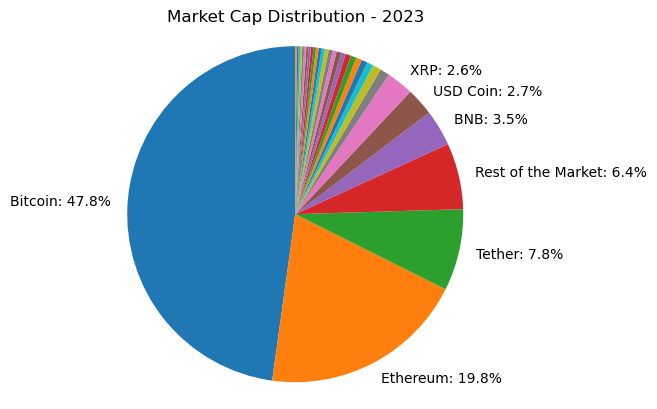

In [311]:
# In this visualization, I represent the data mentioned above through a pie chart, illustrating the distribution of market capitalization among the top currencies in 2023.
# Assuming you have a DataFrame named 'df51' with columns 'name' and 'Market_Cap'
market_cap_data = df51['Market_Cap']
label_threshold = 1

# Create labels for pie chart
labels = ['' if pct <= label_threshold else f"{label}: {pct:.1f}%" for label, pct in zip(df51['name'], market_cap_data)]

# Plotting the pie chart
_, _, autotexts = plt.pie(market_cap_data, labels=labels, autopct='', startangle=90)

# Adjusting label properties
for i, autotext in enumerate(autotexts):
    if market_cap_data[i] <= label_threshold:
        autotext.set_visible(False)  # Hide labels for smaller areas
    else:
        angle = np.degrees(np.arctan2(*autotext.get_position()))  # Get angle of text position
        x = autotext.get_position()[0] + 0.1 * (1 if angle < -90 else -1)  # Adjust x-position based on angle
        y = autotext.get_position()[1] + 0.05  # Adjust y-position
        plt.annotate(autotext.get_text(), (x, y), color='white')  # Add label to the pie chart

plt.axis('equal')  # Ensure pie is drawn as a circle
plt.title('Market Cap Distribution - 2023')  # Add title to the pie chart
plt.show()


In [269]:
df50

,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,...,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,Market_Cap,quote.USD.fully_diluted_market_cap,Timestamp
0,Bitcoin,BTC,bitcoin,10247,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00,19401043.00,19401043.00,False,...,-0.14,0.48,1.66,-2.61,-15.22,6.14,506735339591.49,47.67,548498456058.33,13-06-2023 11:54:56
1,Ethereum,ETH,ethereum,7000,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120226966.54,120226966.54,True,...,-0.15,0.15,-3.54,-2.97,-17.33,4.48,210209431084.18,19.77,210209431084.18,13-06-2023 11:54:56
2,Tether,USDT,tether,55466,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,83366513300.21,86083529362.37,True,...,-0.01,-0.01,-0.04,-0.06,-0.09,-0.41,83367800079.64,7.84,86084858079.51,13-06-2023 11:54:56
3,BNB,BNB,bnb,1458,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,155854280.19,155854280.19,False,...,0.03,1.35,-14.91,-24.20,-29.08,-22.94,36864346070.52,3.47,36864346070.52,13-06-2023 11:54:56
4,XRP,XRP,xrp,965,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00,51987017573.00,99988884267.00,False,...,5.58,7.95,10.18,31.20,5.14,51.94,29102114943.68,2.74,55979581638.46,13-06-2023 11:54:56
5,USD Coin,USDC,usd-coin,12962,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,28290016362.73,28290016362.73,False,...,-0.00,0.01,-0.01,-0.00,0.02,0.10,28291659094.63,2.66,28291659094.63,13-06-2023 11:54:56
6,Cardano,ADA,cardano,837,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00,34910064614.80,35873953355.06,False,...,0.75,0.46,-19.78,-23.01,-35.97,-15.95,9882808437.71,0.93,12739202422.11,13-06-2023 11:54:56
7,Dogecoin,DOGE,dogecoin,728,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,139748816383.71,139748816383.71,True,...,0.07,0.94,-7.35,-14.13,-31.39,-15.44,8640703619.28,0.81,8640703619.28,13-06-2023 11:54:56
8,TRON,TRX,tron,772,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem']",NaN,90097004306.19,90097133475.12,True,...,0.22,2.76,-8.37,3.72,7.73,8.75,6481628357.89,0.61,6481637650.38,13-06-2023 11:54:56
9,Solana,SOL,solana,472,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,398977691.47,549929809.10,True,...,0.32,0.95,-21.89,-26.05,-37.97,-24.22,6191372969.04,0.58,8533861987.05,13-06-2023 11:54:56


In [275]:
df52 = df50.rename(columns={'quote.USD.percent_change_1h': '1 HOUR', 'quote.USD.percent_change_24h': '24 HOUR','quote.USD.percent_change_7d': '7 DAYS','quote.USD.percent_change_30d': '30 DAYS','quote.USD.percent_change_60d': '60 DAYS','quote.USD.percent_change_90d': '90 DAYS'})
df53 = df52[['name', '1 HOUR', '24 HOUR', '7 DAYS', '30 DAYS', '60 DAYS', '90 DAYS']]

df53

,name,1 HOUR,24 HOUR,7 DAYS,30 DAYS,60 DAYS,90 DAYS
0,Bitcoin,-0.14,0.48,1.66,-2.61,-15.22,6.14
1,Ethereum,-0.15,0.15,-3.54,-2.97,-17.33,4.48
2,Tether,-0.01,-0.01,-0.04,-0.06,-0.09,-0.41
3,BNB,0.03,1.35,-14.91,-24.20,-29.08,-22.94
4,XRP,5.58,7.95,10.18,31.20,5.14,51.94
5,USD Coin,-0.00,0.01,-0.01,-0.00,0.02,0.10
6,Cardano,0.75,0.46,-19.78,-23.01,-35.97,-15.95
7,Dogecoin,0.07,0.94,-7.35,-14.13,-31.39,-15.44
8,TRON,0.22,2.76,-8.37,3.72,7.73,8.75
9,Solana,0.32,0.95,-21.89,-26.05,-37.97,-24.22


In [288]:
df55 = df53.set_index('name')
df55

,1 HOUR,24 HOUR,7 DAYS,30 DAYS,60 DAYS,90 DAYS
name,,,,,,
Bitcoin,-0.14,0.48,1.66,-2.61,-15.22,6.14
Ethereum,-0.15,0.15,-3.54,-2.97,-17.33,4.48
Tether,-0.01,-0.01,-0.04,-0.06,-0.09,-0.41
BNB,0.03,1.35,-14.91,-24.20,-29.08,-22.94
XRP,5.58,7.95,10.18,31.20,5.14,51.94
USD Coin,-0.00,0.01,-0.01,-0.00,0.02,0.10
Cardano,0.75,0.46,-19.78,-23.01,-35.97,-15.95
Dogecoin,0.07,0.94,-7.35,-14.13,-31.39,-15.44
TRON,0.22,2.76,-8.37,3.72,7.73,8.75


In [292]:
type(df55)

pandas.core.series.Series

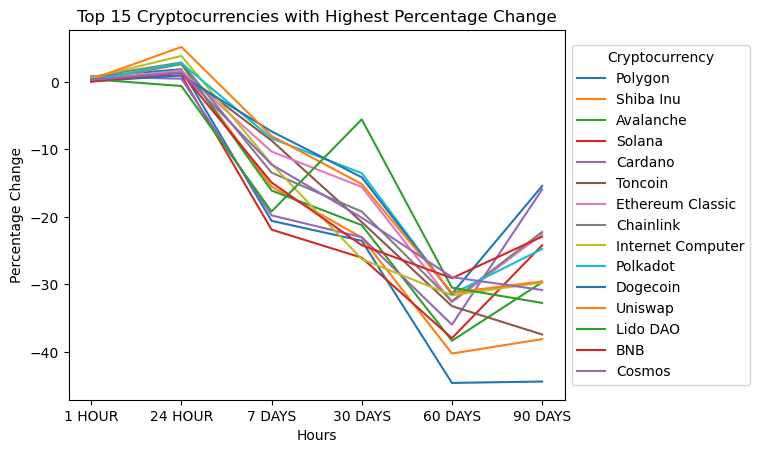

In [324]:
# This line graph displays the top 15 cryptocurrencies with the highest percentage change over different time periods, highlighting their performance.
import pandas as pd
import matplotlib.pyplot as plt


# Sort the DataFrame by the desired column ('1 HOUR' in this example) in descending order
df_sorted = df53.sort_values('60 DAYS', ascending=True)

# Select the top N values (e.g., top 10)
top_n = 15
df_top = df_sorted.head(top_n)

# Transpose the DataFrame
df_transposed = df_top.set_index('name').T

# Plot the transposed DataFrame
ax = df_transposed.plot(kind='line')

plt.xlabel('Hours')
plt.ylabel('Percentage Change')
plt.title(f'Top {top_n} Cryptocurrencies with Highest Percentage Change')

# Move the legend keys to the right
ax.legend(title='Cryptocurrency', bbox_to_anchor=(1, 0.5), loc='center left')

plt.show()





